In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
class RunningClickCounter:
    def __init__(self, window_size=6, avg_window=7):  # Added avg_window
        self.window_size = window_size
        self.avg_window = avg_window #Added average window size
        self.click_stream = []
        self.rolling_sums = []
        self.rolling_avg = [] #Added rolling average
        self.day_counter = 0

    def add_click(self, click_count):
        self.day_counter += 1
        self.click_stream.append(click_count)

        window_start = max(0, len(self.click_stream) - self.window_size)
        window_sum = sum(self.click_stream[window_start:])
        self.rolling_sums.append(window_sum)

        avg_start = max(0, len(self.click_stream) - self.avg_window)
        window_avg = np.mean(self.click_stream[avg_start:]) if self.click_stream[avg_start:] else 0
        self.rolling_avg.append(window_avg)

    def get_data(self):
        days = np.arange(1, self.day_counter + 1)
        return days, self.click_stream, self.rolling_sums, self.rolling_avg

    def plot_data(self):
        days, daily_clicks, rolling_sums, rolling_avg = self.get_data()

        if not days.size:
            print("No data to plot")
            return

        fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)  # 2 rows, 1 column, shared x-axis

        # Plot 1: Daily and Rolling Sums
        axes[0].plot(days, daily_clicks, label="Daily Clicks", marker='o', linestyle='-', markersize=4)
        axes[0].plot(days, rolling_sums, label=f"{self.window_size}-Day Rolling Sum", marker='x', linestyle='--', markersize=6)
        axes[0].set_ylabel("Click Count/Sum")
        axes[0].set_title("Daily Clicks and Rolling Sum")
        axes[0].grid(True, linestyle='--', alpha=0.7)
        axes[0].legend()

        # Plot 2: Rolling Average
        axes[1].plot(days, rolling_avg, label=f"{self.avg_window}-Day Rolling Average", marker='s', linestyle='-.', markersize=6, color='green') #Added rolling average plot
        axes[1].set_xlabel("Day")
        axes[1].set_ylabel("Average Click Count")
        axes[1].set_title("Rolling Average")
        axes[1].grid(True, linestyle='--', alpha=0.7)
        axes[1].legend()

        plt.tight_layout()
        plt.show()

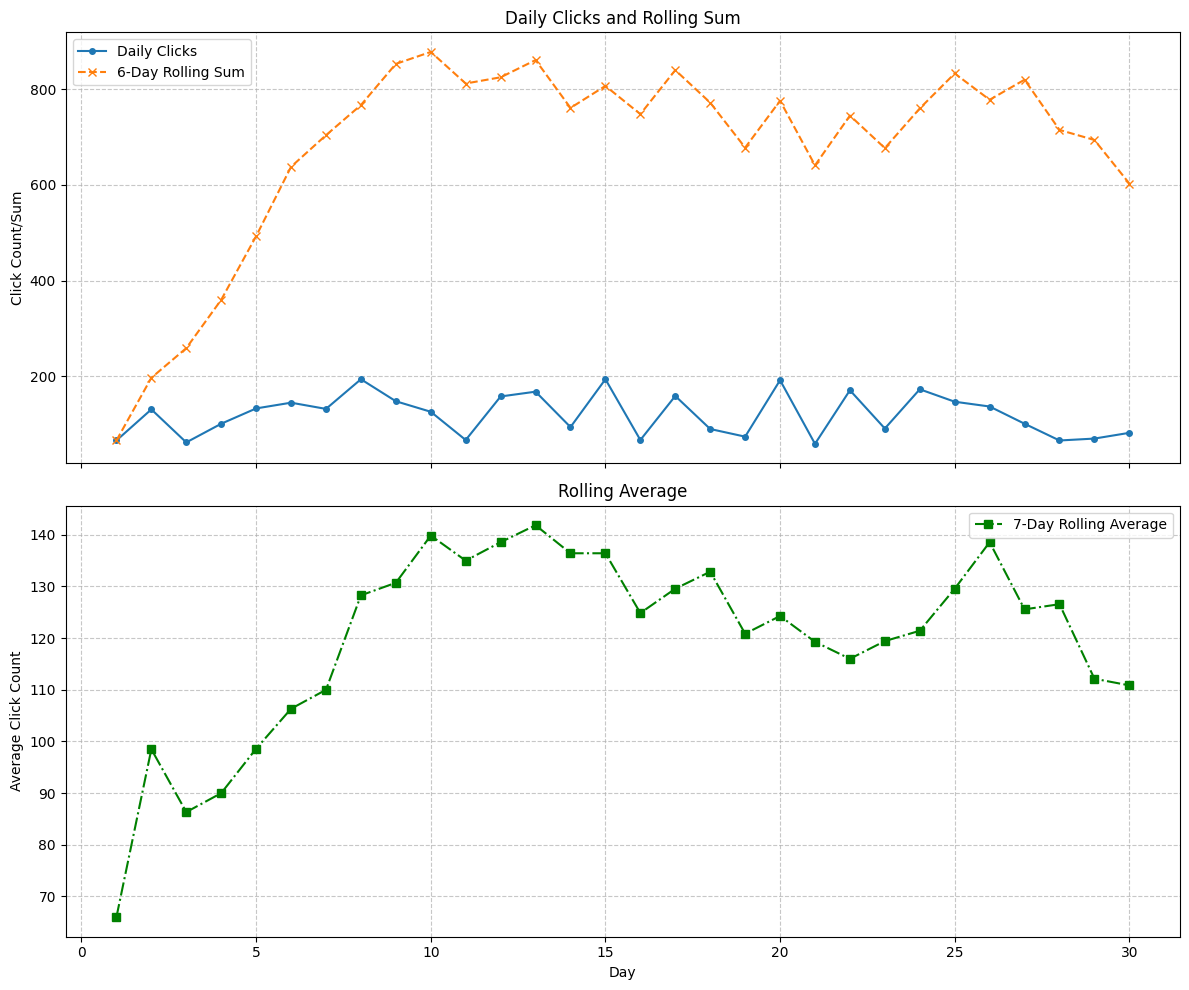

In [ ]:
# Example usage:
counter = RunningClickCounter()
clicks = [random.randint(50, 200) for _ in range(30)]
for click in clicks:
    counter.add_click(click)
counter.plot_data()

counter_diff_windows = RunningClickCounter(3, 10) #Example with different window sizes
clicks_diff_windows = [random.randint(50, 200) for _ in range(40)]
for click in clicks_diff_windows:
    counter_diff_windows.add_click(click)
counter_diff_windows.plot_data()

counter_no_data = RunningClickCounter(7,5)
counter_no_data.plot_data()